# Proyecto Final BigData & Machine Learnign (UPSO)
## *Profesor: Ing. Valentín Barco*

## *Alumno: Iván Gonzalo Tapia*

## `Introducción`

El proyecto tiene como objetivo principal realizar un análisis exhaustivo del rendimiento y producción de dos de los cultivos más significativos en Argentina: trigo y soja. La iniciativa trata de proporcionar una comprensión detallada de los patrones de producción a nivel nacional.

## `Objetivos del proyecto`

Agricultura

● **Análisis de Producción**: Evaluar y comparar el rendimiento anual de trigo y soja en todas las provincias y departamentos de Argentina.

● **Exploración Geoespacial**: Utilizar algoritmos de clustering para identificar las regiones geográficas que exhiben patrones similares de producción agrícola.

● **Visualización Interactiva**: Generar gráficos y visualizaciones interactivas que permitan a los usuarios explorar los datos de producción y rendimiento de manera intuitiva.


## `Justificación`
Argentina es un actor clave en la producción agrícola a nivel mundial, y el trigo y la soja son fundamentales para nuestra economía. Entender las variaciones en la producción a nivel regional es esencial para interiorizarse en los niveles de producción de cada región en nuestro país.


## `Alcance del Proyecto`
El alcance abarca la totalidad del territorio argentino, examinando datos a nivel de provincias y localidades. Se emplearán técnicas de análisis de datos, visualización y algoritmos de clustering para ofrecer una visión integral y detallada de los patrones de producción de trigo y soja.

## 1 - Import de Librerias, carga de datos, función para sanitizar los DF y función para organizar DataSets desorganizados.

#### Inicio

En esta sección, se realizan los pasos iniciales para el desarrollo del proyecto, que incluyen la importación de librerías, carga y preprocesamiento de datos.

#### Librerías necesarias para el desarrollo del proyecto
Se importaron las siguientes librerías necesarias:

```python
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.cluster import KMeans, MeanShift, DBSCAN

from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.cluster import estimate_bandwidth
```

#### Carga de Datos

Se cargaron los datos desde varios archivos .csv y .xlsx, los cuales fueron extraídos de fuentes oficiales del gobierno, todos los DataSets están públicados en la siguiente página https://datos.gob.ar/dataset

#### `def sanitizar_dataframe(df)`
  Sanitiza el DataFrame eliminando filas con valores NaN y convierte las columnas numéricas al tipo correspondiente.
```
  Parameters:
    - df (pd.DataFrame): El DataFrame a sanitizar.
  Returns:
    - pd.DataFrame: DataFrame sanitizado.
```

#### `def organizar_datos(df)`

La función organizar_datos está diseñada para procesar un DataFrame que proviene de un archivo Excel con un formato específico. El archivo tiene una columna combinada que contiene múltiples campos separados por comas, y el objetivo de la función es dividir esta columna en varias columnas individuales, asignar nombres apropiados a estas columnas y luego combinarlas con el DataFrame original, formando un nuevo dataframe con el formato esperado y apto para ser analizado.

In [2]:
# Librerias necesarias para el desarrollo del proyecto
import os
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
# Modelos
from sklearn.cluster import KMeans, MeanShift, DBSCAN
# Mediciones, análisis y procesamiento
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score
from sklearn.cluster import estimate_bandwidth


In [3]:
# Rutas de los datos
path_avena = '/content/drive/MyDrive/UPSO ML & BD/DatasetGob/avena-anual-1923-2020.csv'
path_maiz = '/content/drive/MyDrive/UPSO ML & BD/DatasetGob/maiz-serie-1923-2019-anual.csv'
path_girasol = '/content/drive/MyDrive/UPSO ML & BD/DatasetGob/girasol-anual-1969-2019.csv'
path_trigo = '/content/drive/MyDrive/UPSO ML & BD/DatasetGob/trigo-serie-1923-2020-anual.csv'
path_centeno = '/content/drive/MyDrive/UPSO ML & BD/DatasetGob/centeno-anual-1923-2020.csv'
path_soja = '/content/drive/MyDrive/UPSO ML & BD/DatasetGob/soja-anual-1969-2020.csv'
path_estimacion = '/content/drive/MyDrive/UPSO ML & BD/DatasetGob/estimaciones-agricolas-2023-10-trigo.xlsx'
path_biocombustible = '/content/drive/MyDrive/UPSO ML & BD/DatasetGob/produccion-de-biodiesel-por-planta-de-produccion-.csv'

In [4]:
def sanitizar_dataframe(df):
    """
    Sanitiza el DataFrame eliminando filas con valores NaN y convierte las columnas numéricas al tipo correspondiente.

    Parameters:
    - df (pd.DataFrame): El DataFrame a sanitizar.

    Returns:
    - pd.DataFrame: DataFrame sanitizado.
    """
    for columna in df.columns:
        # Aplica las transformaciones
        if pd.api.types.is_numeric_dtype(df[columna]):
            # Si la columna es de tipo numérico
            df[columna] = pd.to_numeric(df[columna], errors='coerce')
            # Elimina filas con NaN
            df = df.loc[~df[columna].isna()]
            # Convierte la columna al tipo correspondiente
            df[columna] = df[columna].astype(df[columna].dtype)

    return df

In [5]:
def organizar_datos(dataframe):
    # Divide la columna combinada en varias columnas
    columnas_separadas = dataframe[
        'id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campania,campania,sup_sembrada,sup_cosechada,produccion ,rendimiento'].str.split(',', expand=True)

    # Asigna los nombres de las columnas al DataFrame resultante
    columnas_separadas.columns = [
        'id_provincia', 'provincia', 'id_departamento', 'departamento', 'id_cultivo', 'cultivo', 'id_campania', 'campania', 'sup_sembrada', 'sup_cosechada', 'produccion', 'rendimiento']

    # Combina el DataFrame original con las nuevas columnas
    dataframe = pd.concat([dataframe, columnas_separadas], axis=1)

    # Elimina la columna combinada original
    dataframe.drop('id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campania,campania,sup_sembrada,sup_cosechada,produccion ,rendimiento', axis=1, inplace=True)

    return dataframe

## 2 - Analisis exploratorio de datos



### Carga y Sanitización de los DataFrames

1. **Carga del Archivo CSV:** Se cargó los archivos CSV correspondientes a los diferentes cultivos DataFrames utilizando la biblioteca pandas.

2. **Sanitización de los DataFrame:** Para asegurar la calidad de los datos, se aplicó la función `sanitizar_dataframe` a todos estos DataFrames para manejar posibles valores NaN y otras prácticas de saneamiento.

### Exploración de Datos

3. **Tipos de Datos:** Se verificaron los tipos de datos de las columnas del DataFrame `df_maiz` para garantizar la coherencia en el análisis.

### Visualización de Tendencias

4. **Gráfico de Tendencia de Características del Cultivo:**
   - Se utilizó Plotly Express para crear un gráfico lineal que muestra la tendencia de las características de los diferentes cultivos a lo largo del tiempo.
   - Se graficaron las variables 'superficie_sembrada_ha', 'superficie_cosechada_ha' y 'produccion_t'.
   - El eje x representa el tiempo (Año), y el eje y representa los valores de las variables.
   - Se asignaron colores distintivos para cada variable ('superficie_sembrada_ha': azul, 'superficie_cosechada_ha': naranja, 'produccion_t': verde).

5. **Gráfico de Rendimiento de Cultivo por Año:**
   - Se creó otro gráfico lineal para visualizar la tendencia del rendimiento del cultivo por año.
   - El eje x representa el tiempo (Año), y el eje y representa el rendimiento en kg/ha ('rendimiento_kgxha').
   - Se utilizó Plotly Express para la creación del gráfico lineal.

### Generalización del Proceso

Estos pasos de carga, sanitización y visualización de datos se aplicaron de manera similar a otros cultivos, como girasol, trigo, soja y centeno. Los DataFrames resultantes para cada cultivo, como `df_girasol`, `df_trigo`, `df_soja`, y `df_centeno`, permitieron un análisis comparativo de las tendencias de producción y rendimiento a lo largo de los años en Argentina.

Este enfoque sistemático proporciona una visión integral de las características agrícolas en Argentina, permitiendo la identificación de patrones, análisis de tendencias y toma de decisiones informadas en el sector agrícola.


#### Avena

In [6]:
df_avena = pd.read_csv(path_avena)   #cargar el archivo csv en un df
df_avena.head()

,indice_tiempo,superficie_sembrada_avena_ha,superficie_cosechada_avena_ha,produccion_avena_t,rendimiento_avena_kgxha
0,1923,1083760,859596,1104052.0,1284
1,1924,1066575,690902,775611.0,1123
2,1925,1289990,905407,1166682.0,1289
3,1926,1283300,898068,961998.0,1071
4,1927,1278900,705430,759000.0,1076


In [7]:
df_avena.shape

(98, 5)

In [8]:
# Sanitizo el DF porque vi que tenia algunos NaN, asique por buena practica voy a sanitizar cualquier DF antes de usarlo
df_avena = sanitizar_dataframe(df_avena)
df_avena

,indice_tiempo,superficie_sembrada_avena_ha,superficie_cosechada_avena_ha,produccion_avena_t,rendimiento_avena_kgxha
0,1923,1083760,859596,1104052.0,1284
1,1924,1066575,690902,775611.0,1123
2,1925,1289990,905407,1166682.0,1289
3,1926,1283300,898068,961998.0,1071
4,1927,1278900,705430,759000.0,1076
...,...,...,...,...,...
93,2016,1353074,321054,784981.0,2445
94,2017,1150896,218399,491713.0,2251
95,2018,1364520,238166,571630.0,2400
96,2019,1484966,322328,600105.0,1862


In [11]:
# Obtener los tipos de datos de las columnas
df_avena['produccion_avena_t'].dtype

dtype('int64')

In [12]:
# Graficar los datos del dataset con un grafico lineal de plotly
fig = px.line(df_avena, x='indice_tiempo',
              y=['superficie_sembrada_avena_ha', 'superficie_cosechada_avena_ha', 'produccion_avena_t'],
              title='Tendencia de Características de maiz por Año',
              labels={'indice_tiempo': 'Año', 'value': 'Valor', 'variable': 'Característica'},
              width=800, height=500,
              color_discrete_map={'superficie_sembrada_avena_ha': 'blue', 'superficie_cosechada_avena_ha': 'orange', 'produccion_avena_t': 'green'})

# Mostrar la figura
fig.show()

#### Maiz

In [ ]:
df_maiz = pd.read_csv(path_maiz)   #cargar el archivo csv en un df
df_maiz.head()

,indice_tiempo,superficie_sembrada_maiz_ha,superficie_cosechada_maiz_ha,produccion_maiz_t,rendimiento_maiz_kgxha
0,1923,3435430,NaN,7030000,NaN
1,1924,3707700,2911768.0,4732235,1625.0
2,1925,4297000,3898912.0,8170000,2096.0
3,1926,4289000,3666650.0,8150000,2223.0
4,1927,4346000,3641826.0,7915000,2173.0


In [ ]:
df_maiz.shape

(97, 5)

In [ ]:
# Sanitizo el DF porque vi que tenia algunos NaN, asique por buena practica voy a sanitizar cualquier DF antes de usarlo
df_maiz = sanitizar_dataframe(df_maiz)
df_maiz

,indice_tiempo,superficie_sembrada_maiz_ha,superficie_cosechada_maiz_ha,produccion_maiz_t,rendimiento_maiz_kgxha
1,1924,3707700,2911768.0,4732235,1625.0
2,1925,4297000,3898912.0,8170000,2096.0
3,1926,4289000,3666650.0,8150000,2223.0
4,1927,4346000,3641826.0,7915000,2173.0
5,1928,4788000,3652577.0,6411529,1755.0
...,...,...,...,...,...
92,2015,6904538,5346593.0,39792854,7443.0
93,2016,8486694,6536763.0,49490326,7571.0
94,2017,9139766,7138620.0,43462323,6088.0
95,2018,9039594,7232761.0,56860704,7862.0


In [ ]:
# Obtener los tipos de datos de las columnas
df_maiz['indice_tiempo'].dtype

dtype('int64')

In [ ]:
# Obtener el tamaño del dataset
df_maiz.shape

(96, 5)

In [ ]:
# Graficar los datos del dataset con un grafico lineal de plotly
fig = px.line(df_maiz, x='indice_tiempo',
              y=['superficie_sembrada_maiz_ha', 'superficie_cosechada_maiz_ha', 'produccion_maiz_t'],
              title='Tendencia de Características de maiz por Año',
              labels={'indice_tiempo': 'Año', 'value': 'Valor', 'variable': 'Característica'},
              width=800, height=500,
              color_discrete_map={'superficie_sembrada_maiz_ha': 'blue', 'superficie_cosechada_maiz_ha': 'orange', 'produccion_maiz_t': 'green'})

# Mostrar la figura
fig.show()

In [ ]:
# Graficar el rendimiento de maiz por año
fig_rendimiento = px.line(df_maiz, x='indice_tiempo', y='rendimiento_maiz_kgxha',

                           title='Tendencia de Rendimiento de maiz por Año',
                           labels={'indice_tiempo': 'Año', 'rendimiento_maiz_kgxha': 'Rendimiento (kg/ha)'},
                           width=800, height=500, line_shape="linear", render_mode="auto",
                          )


# Mostrar la figura
fig_rendimiento.show()

#### Girasol

In [ ]:
df_girasol = pd.read_csv(path_girasol)   #cargar el archivo csv en un df
df_girasol = sanitizar_dataframe(df_girasol)
df_girasol.head()

,anio,superficie_sembrada_girasol_ha,superficie_cosechada_girasol_ha,produccion_girasol_t,rendimiento_girasol_kgxha
0,1969,1472300,1347400,1140000,846
1,1970,1614200,1313100,830000,632
2,1971,1532700,1286500,828000,644
3,1972,1652400,1337900,880000,658
4,1973,1341900,1189800,970000,815


In [ ]:
df_girasol.shape

(51, 5)

In [ ]:
fig = px.line(df_girasol, x='anio',
              y=['superficie_sembrada_girasol_ha', 'superficie_cosechada_girasol_ha', 'produccion_girasol_t'],
              title='Tendencia de Características de girasol por Año',
              labels={'anio': 'Año', 'value': 'Valor', 'variable': 'Característica'},
              width=800, height=500,
              color_discrete_map={'superficie_sembrada_girasol_ha': 'blue', 'superficie_cosechada_girasol_ha': 'orange', 'produccion_girasol_t': 'green'})

# Mostrar la figura
fig.show()

#### Trigo

In [ ]:
df_trigo = pd.read_csv(path_trigo)
df_trigo = sanitizar_dataframe(df_trigo)
df_trigo.head()

,indice_tiempo,superficie_sembrada_trigo_ha,superficie_cosechada_trigo_ha,produccion_trigo_t,rendimiento_trigo_kgxha
0,1923,6833343,6778430,6635565,979
1,1924,7200500,6465440,5201979,805
2,1925,6577970,5928650,4093998,691
3,1926,7800000,7669751,6261624,816
4,1927,8372990,8172990,7682990,940


In [ ]:
df_trigo.shape

(98, 5)

In [ ]:
df_trigo.columns

Index(['indice_tiempo', 'superficie_sembrada_trigo_ha',
       'superficie_cosechada_trigo_ha', 'produccion_trigo_t',
       'rendimiento_trigo_kgxha'],
      dtype='object')

In [ ]:
# Agrupar por año y calcular el rendimiento promedio
df_agrupado = df_trigo.groupby('indice_tiempo')['rendimiento_trigo_kgxha'].mean().reset_index()

# Graficar con Plotly Express
fig = px.bar(df_agrupado, x='indice_tiempo', y='rendimiento_trigo_kgxha',
              title='Rendimiento de Trigo por Año',
              labels={'indice_tiempo': 'Año', 'rendimiento_trigo_kgxha': 'Rendimiento (kg/ha)'},
              width=800, height=500)

# Mostrar la figura
fig.show()

In [ ]:
fig = px.bar(df_trigo, x='indice_tiempo',
              y=['superficie_sembrada_trigo_ha', 'superficie_cosechada_trigo_ha', 'produccion_trigo_t', 'rendimiento_trigo_kgxha'],
              title='Comparación de Características de Trigo por Año',
              labels={'indice_tiempo': 'Año', 'value': 'Valor', 'variable': 'Característica'},
              width=800, height=500,
              category_orders={'variable': ['superficie_sembrada_trigo_ha', 'superficie_cosechada_trigo_ha', 'produccion_trigo_t', 'rendimiento_trigo_kgxha']},
              color_discrete_map={'superficie_sembrada_trigo_ha': 'blue', 'superficie_cosechada_trigo_ha': 'orange', 'produccion_trigo_t': 'green', 'rendimiento_trigo_kgxha': 'red'})

# Mostrar la figura
fig.show()

In [ ]:
fig = px.line(df_trigo, x='indice_tiempo',
              y=['superficie_sembrada_trigo_ha', 'superficie_cosechada_trigo_ha', 'produccion_trigo_t'],
              title='Tendencia de Características de Trigo por Año',
              labels={'indice_tiempo': 'Año', 'value': 'Valor', 'variable': 'Característica'},
              width=800, height=500,
              color_discrete_map={'superficie_sembrada_trigo_ha': 'blue', 'superficie_cosechada_trigo_ha': 'orange', 'produccion_trigo_t': 'green'})

# Mostrar la figura
fig.show()

In [ ]:
# Graficar el rendimiento de trigo por año
fig_rendimiento = px.line(df_trigo, x='indice_tiempo', y='rendimiento_trigo_kgxha',

                           title='Tendencia de Rendimiento de Trigo por Año',
                           labels={'indice_tiempo': 'Año', 'rendimiento_trigo_kgxha': 'Rendimiento (kg/ha)'},
                           width=800, height=500, line_shape="linear", render_mode="auto",
                          )


# Mostrar la figura
fig_rendimiento.show()

#### Soja

In [ ]:
df_soja = pd.read_csv(path_soja)   #cargar el archivo csv en un df
df_soja = sanitizar_dataframe(df_soja)
df_soja.head()

,indice_tiempo,superficie_sembrada_soja_ha,superficie_cosechada_soja_ha,produccion_soja_t,rendimiento_soja_kgxha
0,1969,30470,25970,26800,1032
1,1970,37700,36330,59000,1624
2,1971,79800,68000,78000,1147
3,1972,169360,156950,271904,1732
4,1973,376600,344340,495880,1440


In [ ]:
fig = px.line(df_soja, x='indice_tiempo',
              y=['superficie_sembrada_soja_ha', 'superficie_cosechada_soja_ha', 'produccion_soja_t'],
              title='Tendencia de Características de soja por Año',
              labels={'indice_tiempo': 'Año', 'value': 'Valor', 'variable': 'Característica'},
              width=800, height=500,
              color_discrete_map={'superficie_sembrada_soja_ha': 'blue', 'superficie_cosechada_soja_ha': 'orange', 'produccion_soja_t': 'green'})
fig.show()

In [ ]:
# Graficar el rendimiento de trigo por año
fig_rendimiento = px.line(df_soja, x='indice_tiempo', y='rendimiento_soja_kgxha',

                           title='Tendencia de Rendimiento de soja por Año',
                           labels={'indice_tiempo': 'Año', 'rendimiento_soja_kgxha': 'Rendimiento (kg/ha)'},
                           width=800, height=500, line_shape="linear", render_mode="auto",
                          )


# Mostrar la figura
fig_rendimiento.show()

#### Centeno

In [ ]:
df_centeno = pd.read_csv(path_centeno)
df_centeno = sanitizar_dataframe(df_centeno)
df_centeno.head()

,indice_tiempo,superficie_sembrada_centeno_ha,superficie_cosechada_centeno_ha,produccion_centeno_t,rendimiento_centeno_kgxha
0,1923,157510,152652,97876.0,641
1,1924,156000,65471,37020.0,565
2,1925,202590,144092,121163.0,841
3,1926,220100,197095,142120.0,721
4,1927,339800,268663,207505.0,772


In [ ]:
df_centeno.shape

(98, 5)

In [ ]:
fig = px.line(df_centeno, x='indice_tiempo',
              y=['superficie_sembrada_centeno_ha', 'superficie_cosechada_centeno_ha', 'produccion_centeno_t'],
              title='Tendencia de Características de centeno por Año',
              labels={'indice_tiempo': 'Año', 'value': 'Valor', 'variable': 'Característica'},
              width=800, height=500,
              color_discrete_map={'superficie_sembrada_centeno_ha': 'blue', 'superficie_cosechada_centeno_ha': 'orange', 'produccion_centeno_t': 'green'})

# Mostrar la figura
fig.show()

In [ ]:
# Graficar el rendimiento de trigo por año
fig_rendimiento = px.line(df_centeno, x='indice_tiempo', y='rendimiento_centeno_kgxha',

                           title='Tendencia de Rendimiento de centeno por Año',
                           labels={'indice_tiempo': 'Año', 'rendimiento_centeno_kgxha': 'Rendimiento (kg/ha)'},
                           width=800, height=500, line_shape="linear", render_mode="auto",
                          )


# Mostrar la figura
fig_rendimiento.show()

#### Biocombustible

In [ ]:
df_biocombustible = pd.read_csv(path_biocombustible)
df_biocombustible.head()

,id_cod_pais,id_ nom_pais,año,mes,id_uni_med,id_nom_med,grande,grande no integrada,mediana,pequeña
0,32,Argentina,2014,Enero,t,toneladas,86639,3545,44409,5879
1,32,Argentina,2014,Febrero,t,toneladas,100526,7885,21999,2179
2,32,Argentina,2014,Marzo,t,toneladas,81779,963,36880,1572
3,32,Argentina,2014,Abril,t,toneladas,74163,20169,45902,2236
4,32,Argentina,2014,Mayo,t,toneladas,144216,22853,57941,4292


In [ ]:
df_biocombustible.shape

(65, 10)

## ESTIMACIONES AGRICOLAS

In [ ]:
df_estimacion = pd.read_excel(path_estimacion)
df_estimacion.head()

,"id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campania,campania,sup_sembrada,sup_cosechada,produccion ,rendimiento"
0,"6,Buenos Aires,854,25 de Mayo,1,Ajo,1,1969/197..."
1,"6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo..."
2,"6,Buenos Aires,21,Alberti,1,Ajo,1,1969/1970,5,..."
3,"6,Buenos Aires,28,Almirante Brown,1,Ajo,1,1969..."
4,"6,Buenos Aires,77,Arrecifes,1,Ajo,1,1969/1970,..."


In [ ]:
# Llama a la función para organizar los datos del df_estimacion y que quede como un dataframe manipulable
df_estimacion = organizar_datos(df_estimacion)

# Muestra el DataFrame resultante
df_estimacion

,id_provincia,provincia,id_departamento,departamento,id_cultivo,cultivo,id_campania,campania,sup_sembrada,sup_cosechada,produccion,rendimiento
0,6,Buenos Aires,854,25 de Mayo,1,Ajo,1,1969/1970,3,3,10,3333
1,6,Buenos Aires,14,Adolfo Gonzales Chaves,1,Ajo,1,1969/1970,15,15,82,5467
2,6,Buenos Aires,21,Alberti,1,Ajo,1,1969/1970,5,5,7,1400
3,6,Buenos Aires,28,Almirante Brown,1,Ajo,1,1969/1970,2,2,8,4000
4,6,Buenos Aires,77,Arrecifes,1,Ajo,1,1969/1970,6,6,15,2500
...,...,...,...,...,...,...,...,...,...,...,...,...
153884,90,Tucuman,49,La Cocha,28,Trigo total,53,2022/2023,11880,10440,7308,700
153885,90,Tucuman,56,Leales,28,Trigo total,53,2022/2023,15300,14325,8595,600
153886,90,Tucuman,63,Lules,28,Trigo total,53,2022/2023,300,300,330,1100
153887,90,Tucuman,91,Simoca,28,Trigo total,53,2022/2023,200,200,200,1000


In [ ]:
df_estimacion.shape

(153889, 12)

In [ ]:
# Obtener los tipos de datos de las columnas
df_estimacion['sup_cosechada'].dtype

dtype('O')

In [ ]:
# Despues de analizar el tipo de dato de las columnas, observe que son de tipo O = Object
# Por esto voy a hacer una manipulacion de los datos, al tipo de dato conveniente
# Para poder realizar los analisis correspondientes en los atributos a analizar
df_estimacion['produccion'] = pd.to_numeric(df_estimacion['produccion'], errors='coerce')
df_estimacion['rendimiento'] = pd.to_numeric(df_estimacion['rendimiento'], errors='coerce')
df_estimacion['sup_cosechada'] = pd.to_numeric(df_estimacion['sup_cosechada'], errors='coerce')
df_estimacion['sup_sembrada'] = pd.to_numeric(df_estimacion['sup_sembrada'], errors='coerce')


In [ ]:
# En este paso realizamos un saneado de los datos,
# Es una buena practica ya que al ser datos publicados en la pagina del estado
# Puede venir con datos NaN  o no deseados, que pueden ocasionar problemas cuando queramos analizar
df_estimacion = sanitizar_dataframe(df_estimacion)
df_estimacion.shape

(153875, 12)

In [ ]:
# Convertir lkas columnas a entero una vez que ya sanitizamos el DF esto nos evita errores
df_estimacion['produccion'] = df_estimacion['produccion'].astype(int)
df_estimacion['rendimiento'] = df_estimacion['rendimiento'].astype(int)
df_estimacion['sup_cosechada'] = df_estimacion['sup_cosechada'].astype(int)
df_estimacion['sup_sembrada'] = df_estimacion['sup_sembrada'].astype(int)

In [ ]:
# Seleccion de las columnas de interes para el analisis
columnas_selec = ['id_provincia', 'provincia', 'departamento', 'id_cultivo','campania', 'cultivo', 'sup_sembrada', 'sup_cosechada', 'produccion', 'rendimiento']
df_estimacion = df_estimacion[columnas_selec]

# Muestra el nuevo DataFrame
df_estimacion

,id_provincia,provincia,departamento,id_cultivo,campania,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
0,6,Buenos Aires,25 de Mayo,1,1969/1970,Ajo,3,3,10,3333
1,6,Buenos Aires,Adolfo Gonzales Chaves,1,1969/1970,Ajo,15,15,82,5467
2,6,Buenos Aires,Alberti,1,1969/1970,Ajo,5,5,7,1400
3,6,Buenos Aires,Almirante Brown,1,1969/1970,Ajo,2,2,8,4000
4,6,Buenos Aires,Arrecifes,1,1969/1970,Ajo,6,6,15,2500
...,...,...,...,...,...,...,...,...,...,...
153884,90,Tucuman,La Cocha,28,2022/2023,Trigo total,11880,10440,7308,700
153885,90,Tucuman,Leales,28,2022/2023,Trigo total,15300,14325,8595,600
153886,90,Tucuman,Lules,28,2022/2023,Trigo total,300,300,330,1100
153887,90,Tucuman,Simoca,28,2022/2023,Trigo total,200,200,200,1000


In [ ]:
df_estimacion.columns

Index(['id_provincia', 'provincia', 'departamento', 'id_cultivo', 'campania',
       'cultivo', 'sup_sembrada', 'sup_cosechada', 'produccion',
       'rendimiento'],
      dtype='object')

In [ ]:
# Obtener los tipos de datos de las columnas
df_estimacion['sup_cosechada'].dtype

dtype('int64')

In [ ]:
# Voy a obtener los valores que hay dentro de la columna cultivo, para ver los cultivos que podemos analizar
valores_unicos = df_estimacion['cultivo'].unique()
print(valores_unicos)

['Ajo' 'Algodón' 'Alpiste' 'Arroz' 'Avena' 'Banana' 'Caña de azúcar'
 'Cártamo' 'Cebada cervecera' 'Cebada forrajera' 'Cebolla total' 'Centeno'
 'Girasol' 'Limón' 'Lino' 'Maíz' 'Mandarina' 'Maní' 'Mijo' 'Naranja'
 'Papa total' 'Pomelo' 'Poroto seco' 'Soja total' 'Sorgo' 'Té'
 'Trigo total' 'Tung' 'Yerba mate' 'Trigo candeal' 'Colza' 'Jojoba'
 'Soja 1ra' 'Soja 2da' 'Cebada total' 'Poroto total' 'Arveja' 'Garbanzo'
 'Lenteja' 'Poroto alubia' 'Poroto negro' 'Poroto otros']


In [ ]:
# Voy a obtener los valores que hay dentro de la columna provincia, para ver las provincias que podemos analizar
valores_unicos = df_estimacion['provincia'].unique()
print(valores_unicos)

['Buenos Aires' 'Catamarca' 'Chaco' 'Chubut' 'Cordoba' 'Entre Rios'
 'Formosa' 'Jujuy' 'La Rioja' 'Mendoza' 'Misiones' 'Neuquen' 'Rio Negro'
 'Salta' 'San Juan' 'San Luis' 'Santa Fe' 'Santiago del Estero' 'Tucuman'
 'Corrientes' 'La Pampa' 'Santa Cruz' 'Tierra del Fuego']


In [ ]:
# DF para analizar el rendimiento por provincia y cultivo
df_rendimiento = df_estimacion[['rendimiento', 'provincia','cultivo']]
df_rendimiento

,rendimiento,provincia,cultivo
0,3333,Buenos Aires,Ajo
1,5467,Buenos Aires,Ajo
2,1400,Buenos Aires,Ajo
3,4000,Buenos Aires,Ajo
4,2500,Buenos Aires,Ajo
...,...,...,...
153884,700,Tucuman,Trigo total
153885,600,Tucuman,Trigo total
153886,1100,Tucuman,Trigo total
153887,1000,Tucuman,Trigo total


In [ ]:
# Vamos a seleccionar el cultivo del trigo para analizar a nivel País
# Cultivos Seleccionados
cultivos_deseados = ['Trigo total']

# Filtro el DataFrame solo para esos
df_estimacion_trigo = df_estimacion[df_estimacion['cultivo'].isin(cultivos_deseados)]

# Muestra el DataFrame resultante
df_estimacion_trigo

,id_provincia,provincia,departamento,id_cultivo,campania,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
3801,6,Buenos Aires,25 de Mayo,28,1969/1970,Trigo total,47000,42000,71400,1700
3802,6,Buenos Aires,9 de Julio,28,1969/1970,Trigo total,35000,33000,59400,1800
3803,6,Buenos Aires,Adolfo Alsina,28,1969/1970,Trigo total,125000,110000,143000,1300
3804,6,Buenos Aires,Adolfo Gonzales Chaves,28,1969/1970,Trigo total,45000,43000,75250,1750
3805,6,Buenos Aires,Alberti,28,1969/1970,Trigo total,20000,20000,34000,1700
...,...,...,...,...,...,...,...,...,...,...
153884,90,Tucuman,La Cocha,28,2022/2023,Trigo total,11880,10440,7308,700
153885,90,Tucuman,Leales,28,2022/2023,Trigo total,15300,14325,8595,600
153886,90,Tucuman,Lules,28,2022/2023,Trigo total,300,300,330,1100
153887,90,Tucuman,Simoca,28,2022/2023,Trigo total,200,200,200,1000


In [ ]:
# Grafico para observar la produccion de trigo en las diferentes temporadas y diferentes provincias
import plotly.express as px

fig = px.bar(df_estimacion_trigo, x='campania', y='produccion',
              labels={'produccion': 'Producción (en miles)', 'campania': 'Campaña'}, hover_data=['departamento'])

fig.update_layout(title='Evolución de la Producción de Trigo por Provincia a lo largo del Tiempo')

fig.show()

In [ ]:
# Crear el gráfico de barras agrupadas interactivo con Plotly Express
fig = px.bar(df_estimacion_trigo, x='provincia', y='produccion',
             labels={'produccion': 'Producción total (en miles)'},
             title='Producción Total por Provincia',
             hover_data=['departamento'])

# Mostrar el gráfico
fig.show()

In [ ]:
cultivos_deseados = ['Yerba mate']

# Filtro el DataFrame solo para esos cultivos
df_filtrado_yerba = df_estimacion[df_estimacion['cultivo'].isin(cultivos_deseados)]

# Muestra el DataFrame resultante
df_filtrado_yerba

,id_provincia,provincia,departamento,id_cultivo,campania,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
4124,18,Corrientes,Ituzaingo,31,1969/1970,Yerba mate,3470,1106,2375,2147
4125,18,Corrientes,Santo Tome,31,1969/1970,Yerba mate,5205,1661,3564,2146
4126,54,Misiones,25 de Mayo,31,1969/1970,Yerba mate,908,227,474,2088
4127,54,Misiones,Apostoles,31,1969/1970,Yerba mate,11784,3052,5150,1687
4128,54,Misiones,Cainguas,31,1969/1970,Yerba mate,6078,1566,3568,2278
...,...,...,...,...,...,...,...,...,...,...
145382,54,Misiones,Montecarlo,31,2019/2020,Yerba mate,5962,5962,27425,4600
145383,54,Misiones,Obera,31,2019/2020,Yerba mate,22358,22358,98375,4400
145384,54,Misiones,San Ignacio,31,2019/2020,Yerba mate,16046,16046,70602,4400
145385,54,Misiones,San Javier,31,2019/2020,Yerba mate,2905,2905,12782,4400


In [ ]:
fig = px.bar(df_filtrado_yerba, x='provincia', y='produccion', color='provincia',
             labels={'produccion': 'Producción total (en miles)'},
             title='Producción Total por Provincia')

# Mostramos el gráfico
fig.show()

## Clustering

#### Estimación Trigo

##### Por departamento

In [ ]:
X = df_estimacion_trigo[['produccion', 'rendimiento', 'sup_sembrada', 'sup_cosechada']]

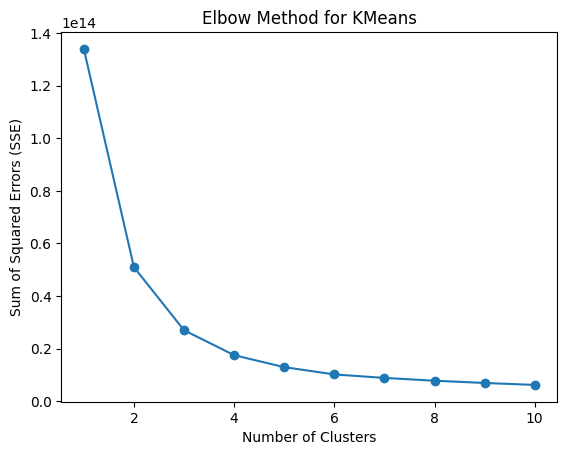

In [ ]:
def find_optimal_clusters_kmeans(data, max_k):
    sse = [] # Suma de los errores cuadrados
    for k in range(1, max_k+1): #iteracion del k en el rango de 1 a 10
        kmeans = KMeans(n_clusters=k, n_init=max_k).fit(data) #por cada k entrenamos el modelo
        sse.append(kmeans.inertia_)                           #agregamos el error cuadrado al array
    #graficamos la curva del codo
    plt.plot(range(1, max_k+1), sse, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Sum of Squared Errors (SSE)")
    plt.title("Elbow Method for KMeans")
    plt.show()
#usamos la funcion para buscar el numero de clusters optimo para elmodelo KMeans
find_optimal_clusters_kmeans(X, 10)

In [ ]:
#creacion del modelo con K optimo
kmeans = KMeans(n_clusters=4, random_state=42)
#entrenamos el modelo y guardamos los resutados en la variable clusters
clusters = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# creamos un df para el modelo KMeans, al que le vamos a agregar los clusters obtenidos
df_estimacion_trigo_km = df_estimacion_trigo.copy()
df_estimacion_trigo_km['clusters'] = clusters
df_estimacion_trigo_km

,id_provincia,provincia,id_cultivo,campania,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento,clusters
3801,6,Buenos Aires,28,1969/1970,Trigo total,47000,42000,71400,1700,0
3802,6,Buenos Aires,28,1969/1970,Trigo total,35000,33000,59400,1800,0
3803,6,Buenos Aires,28,1969/1970,Trigo total,125000,110000,143000,1300,3
3804,6,Buenos Aires,28,1969/1970,Trigo total,45000,43000,75250,1750,0
3805,6,Buenos Aires,28,1969/1970,Trigo total,20000,20000,34000,1700,1
...,...,...,...,...,...,...,...,...,...,...
153884,90,Tucuman,28,2022/2023,Trigo total,11880,10440,7308,700,1
153885,90,Tucuman,28,2022/2023,Trigo total,15300,14325,8595,600,1
153886,90,Tucuman,28,2022/2023,Trigo total,300,300,330,1100,1
153887,90,Tucuman,28,2022/2023,Trigo total,200,200,200,1000,1


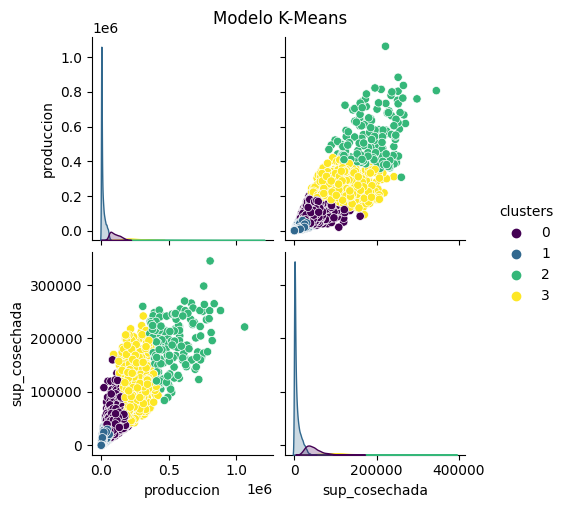

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(df_estimacion_trigo_km, hue='clusters', palette='viridis', vars=['produccion', 'sup_cosechada'])
plt.suptitle('Modelo K-Means', y=1)
plt.show()

In [ ]:
#Falta mapear cada cluster por produccion y agregar los departamentos

In [ ]:
columnas_seleccionadas = ['provincia', 'produccion', 'rendimiento', 'sup_cosechada', 'sup_sembrada']

# Creamos el nuevo DataFrame df_agrupado
df_agrupado_trigo = df_estimacion_trigo_km[columnas_seleccionadas]
df_agrupado_trigo

,provincia,produccion,rendimiento,sup_cosechada,sup_sembrada
3801,Buenos Aires,71400,1700,42000,47000
3802,Buenos Aires,59400,1800,33000,35000
3803,Buenos Aires,143000,1300,110000,125000
3804,Buenos Aires,75250,1750,43000,45000
3805,Buenos Aires,34000,1700,20000,20000
...,...,...,...,...,...
153884,Tucuman,7308,700,10440,11880
153885,Tucuman,8595,600,14325,15300
153886,Tucuman,330,1100,300,300
153887,Tucuman,200,1000,200,200


##### Por provincia

In [ ]:
df_agrupado_por_provincia = df_agrupado_trigo.groupby('provincia').sum().reset_index()

# Visualizar el DataFrame agrupado por 'provincia'
df_agrupado_por_provincia


,provincia,produccion,rendimiento,sup_cosechada,sup_sembrada
0,Buenos Aires,365426402,13254423,154392727,160939168
1,Catamarca,835464,189534,519630,556530
2,Chaco,3920075,1116852,2811093,3303576
3,Chubut,3890,27741,4000,9525
4,Cordoba,84027691,1738993,38653094,42609612
5,Corrientes,81276,126333,44988,48845
6,Entre Rios,30757549,1662576,12289655,12960205
7,Formosa,103501,123081,74710,89320
8,Jujuy,148343,387298,78265,87019
9,La Pampa,32769363,1332422,20498705,23294435


In [ ]:
X2 = df_agrupado_por_provincia[['produccion', 'rendimiento', 'sup_sembrada', 'sup_cosechada']]

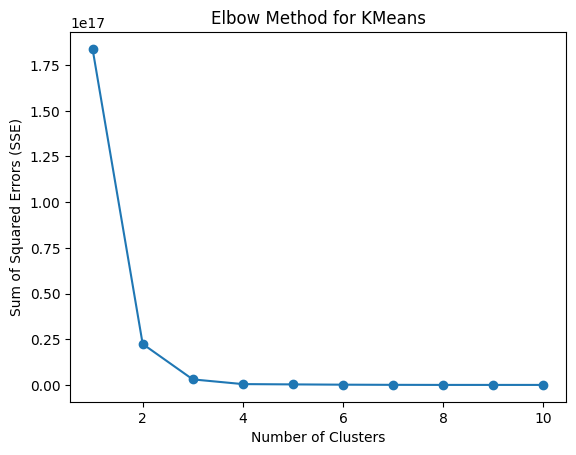

In [ ]:
find_optimal_clusters_kmeans(X2, 10)

In [ ]:
#creacion del modelo con K optimo
kmeans = KMeans(n_clusters=3, random_state=42)
#entrenamos el modelo y guardamos los resutados en la variable clusters
clusters = kmeans.fit_predict(X2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# creamos un df para el modelo KMeans, al que le vamos a agregar los clusters obtenidos
df_agrupado_por_provincia_km = df_agrupado_por_provincia.copy()
df_agrupado_por_provincia_km['clusters'] = clusters
df_agrupado_por_provincia_km

,provincia,produccion,rendimiento,sup_cosechada,sup_sembrada,clusters
0,Buenos Aires,365426402,13254423,154392727,160939168,1
1,Catamarca,835464,189534,519630,556530,2
2,Chaco,3920075,1116852,2811093,3303576,2
3,Chubut,3890,27741,4000,9525,2
4,Cordoba,84027691,1738993,38653094,42609612,0
5,Corrientes,81276,126333,44988,48845,2
6,Entre Rios,30757549,1662576,12289655,12960205,2
7,Formosa,103501,123081,74710,89320,2
8,Jujuy,148343,387298,78265,87019,2
9,La Pampa,32769363,1332422,20498705,23294435,2


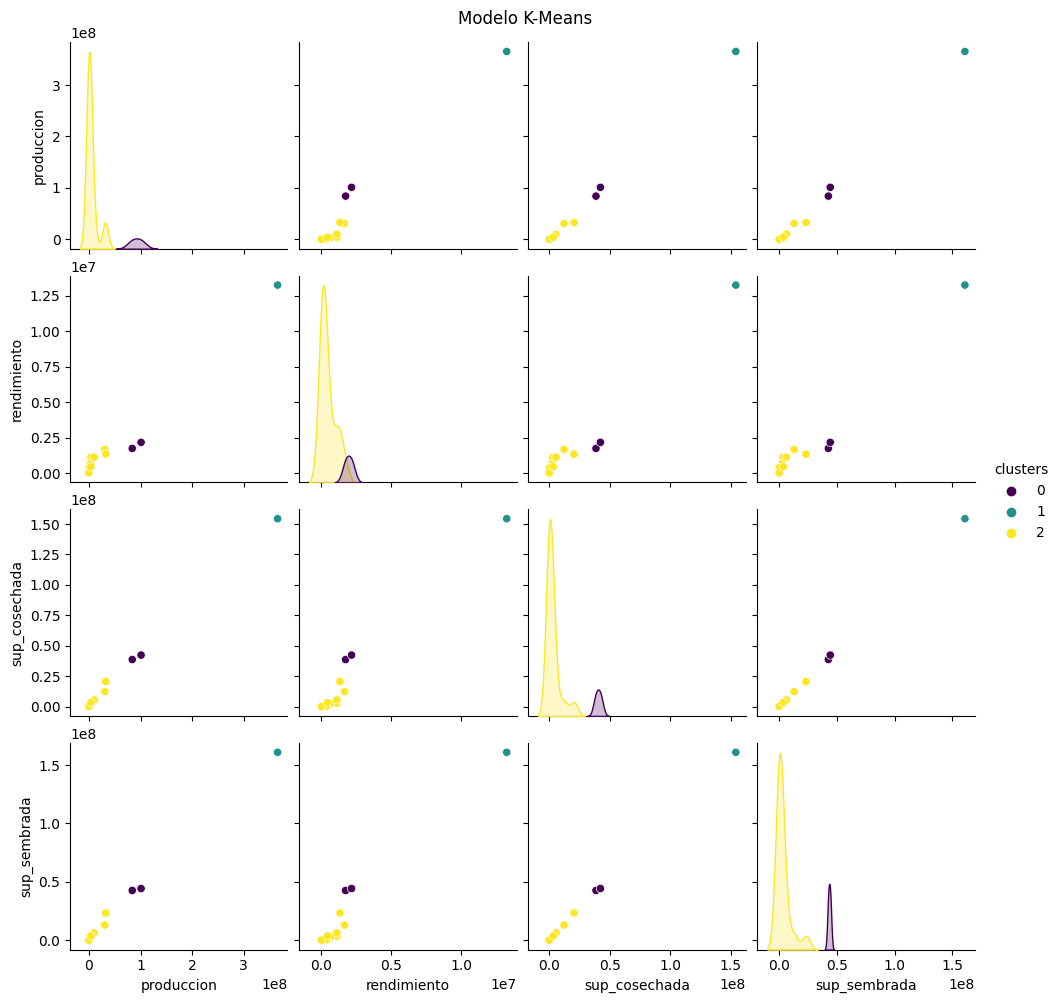

In [ ]:
sns.pairplot(df_agrupado_por_provincia_km, hue='clusters', palette='viridis', vars=['produccion','rendimiento', 'sup_cosechada', 'sup_sembrada'])
plt.suptitle('Modelo K-Means', y=1)
plt.show()

In [ ]:
mapear = {2: 'Medio Bajo',0: 'Medio Alto',1: 'Muy Alto'}

df_agrupado_por_provincia_km['nivel_produccion'] = df_agrupado_por_provincia_km['clusters'].map(mapear)

# Mostrar el DataFrame actualizado
df_agrupado_por_provincia_km

,provincia,produccion,rendimiento,sup_cosechada,sup_sembrada,clusters,nivel_produccion
0,Buenos Aires,365426402,13254423,154392727,160939168,1,Muy Alto
1,Catamarca,835464,189534,519630,556530,2,Medio Bajo
2,Chaco,3920075,1116852,2811093,3303576,2,Medio Bajo
3,Chubut,3890,27741,4000,9525,2,Medio Bajo
4,Cordoba,84027691,1738993,38653094,42609612,0,Medio Alto
5,Corrientes,81276,126333,44988,48845,2,Medio Bajo
6,Entre Rios,30757549,1662576,12289655,12960205,2,Medio Bajo
7,Formosa,103501,123081,74710,89320,2,Medio Bajo
8,Jujuy,148343,387298,78265,87019,2,Medio Bajo
9,La Pampa,32769363,1332422,20498705,23294435,2,Medio Bajo


In [ ]:
#  grafico de dispersin (scatter matrix) con plotly y con symbols para cada cluster
fig = px.scatter_matrix(
    df_agrupado_por_provincia_km,
    dimensions=['produccion', 'rendimiento', 'sup_cosechada', 'sup_sembrada'],
    color='provincia',
    symbol='clusters',
    title='Visualizacion de produccion y rendmiento por provincia'
)


fig.show()

In [ ]:
#  grafico de dispersin (scatter matrix) con plotly y con symbols para cada cluster y con discriminacion de nivel de produccion
fig = px.scatter_matrix(
    df_agrupado_por_provincia_km,
    dimensions=['produccion', 'rendimiento', 'sup_cosechada', 'sup_sembrada'],
    color='provincia',
    symbol='nivel_produccion',
    labels={'clusters': 'Clusters'},
    title='Pair Plot con Información de Clusters y Tamaño de Puntos Ajustado',
)
fig.show()

#### Estimación Soja

##### Por departamento

In [ ]:
# Cultivo Seleccionado
cultivo_deseado = ['soja']

# Filtro el DataFrame para incluir todas las filas donde el nombre del cultivo contiene la palabra "soja"
df_estimacion_soja = df_estimacion[df_estimacion['cultivo'].str.contains('soja', case=False)]

df_estimacion_soja

,id_provincia,provincia,id_cultivo,campania,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento
3478,6,Buenos Aires,25,1969/1970,Soja total,150,150,191,1273
3479,6,Buenos Aires,25,1969/1970,Soja total,50,50,65,1300
3480,6,Buenos Aires,25,1969/1970,Soja total,120,120,144,1200
3481,6,Buenos Aires,25,1969/1970,Soja total,600,600,780,1300
3482,6,Buenos Aires,25,1969/1970,Soja total,150,150,170,1133
...,...,...,...,...,...,...,...,...,...
153322,90,Tucuman,25,2022/2023,Soja total,1200,1200,2400,2000
153323,90,Tucuman,25,2022/2023,Soja total,500,500,950,1900
153324,90,Tucuman,25,2022/2023,Soja total,400,400,760,1900
153325,90,Tucuman,25,2022/2023,Soja total,2800,2800,4200,1500


In [ ]:
df_estimacion_soja['rendimiento'].dtype

dtype('int64')

In [ ]:
X_soja = df_estimacion_soja[['produccion', 'rendimiento', 'sup_sembrada', 'sup_cosechada']]

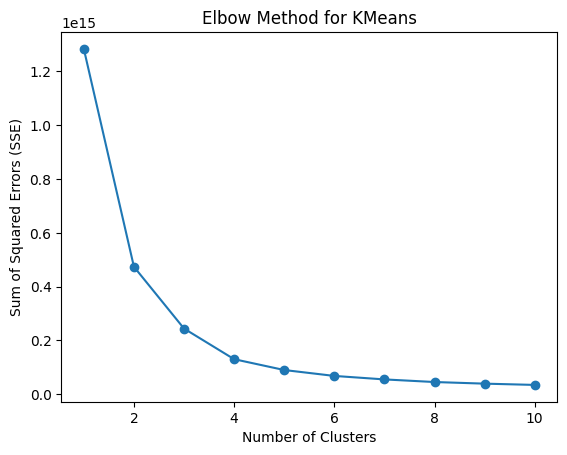

In [ ]:
find_optimal_clusters_kmeans(X_soja, 10)

In [ ]:
#creacion del modelo con K optimo
kmeans = KMeans(n_clusters=4, random_state=42)
#entrenamos el modelo y guardamos los resutados en la variable clusters
clusters = kmeans.fit_predict(X_soja)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# creamos un df para el modelo KMeans, al que le vamos a agregar los clusters obtenidos
df_estimacion_soja_km = df_estimacion_soja.copy()
df_estimacion_soja_km['clusters'] = clusters
df_estimacion_soja_km

,id_provincia,provincia,id_cultivo,campania,cultivo,sup_sembrada,sup_cosechada,produccion,rendimiento,clusters
3478,6,Buenos Aires,25,1969/1970,Soja total,150,150,191,1273,0
3479,6,Buenos Aires,25,1969/1970,Soja total,50,50,65,1300,0
3480,6,Buenos Aires,25,1969/1970,Soja total,120,120,144,1200,0
3481,6,Buenos Aires,25,1969/1970,Soja total,600,600,780,1300,0
3482,6,Buenos Aires,25,1969/1970,Soja total,150,150,170,1133,0
...,...,...,...,...,...,...,...,...,...,...
153322,90,Tucuman,25,2022/2023,Soja total,1200,1200,2400,2000,0
153323,90,Tucuman,25,2022/2023,Soja total,500,500,950,1900,0
153324,90,Tucuman,25,2022/2023,Soja total,400,400,760,1900,0
153325,90,Tucuman,25,2022/2023,Soja total,2800,2800,4200,1500,0


In [ ]:
valores_unicos = df_estimacion_soja_km['clusters'].unique()
print(valores_unicos)

[0 2 1 3]


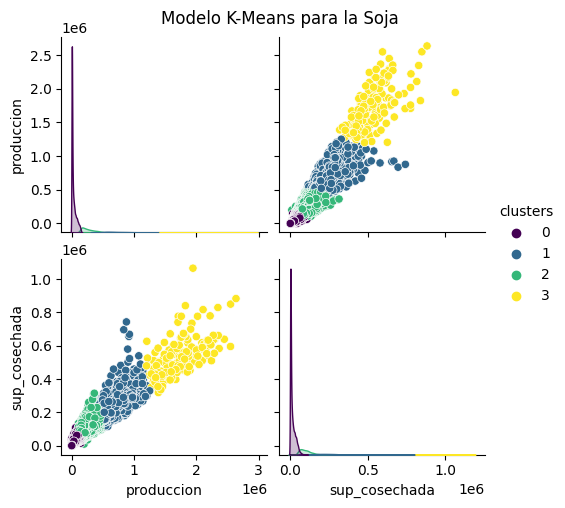

In [ ]:

sns.pairplot(df_estimacion_soja_km, hue='clusters', palette='viridis', vars=['produccion','rendimiento', 'sup_cosechada', 'sup_sembrada'])
plt.suptitle('Modelo K-Means para la Soja', y=1)
plt.show()

In [ ]:
fig = px.scatter(df_estimacion_soja_km,
                 x='produccion',
                 y='sup_cosechada',
                 color='clusters',
                 title='Modelo K-Means para la Soja',
                 labels={'clusters': 'Clusters'},
                 template='plotly',
                 color_continuous_scale='viridis',
                 hover_data=['provincia'])  # Agregar la información de la provincia para el hover

fig.show()

##### Por provincia

In [ ]:
columnas_seleccionadas = ['provincia', 'produccion', 'rendimiento', 'sup_cosechada', 'sup_sembrada']

# Creamos el nuevo DataFrame df_agrupado
df_agrupado_soja = df_estimacion_soja_km[columnas_seleccionadas]
df_agrupado_soja

,provincia,produccion,rendimiento,sup_cosechada,sup_sembrada
3478,Buenos Aires,191,1273,150,150
3479,Buenos Aires,65,1300,50,50
3480,Buenos Aires,144,1200,120,120
3481,Buenos Aires,780,1300,600,600
3482,Buenos Aires,170,1133,150,150
...,...,...,...,...,...
153322,Tucuman,2400,2000,1200,1200
153323,Tucuman,950,1900,500,500
153324,Tucuman,760,1900,400,400
153325,Tucuman,4200,1500,2800,2800


In [ ]:
df_agrupado_por_provincia_soja = df_agrupado_soja.groupby('provincia').sum().reset_index()

# Visualizar el DataFrame agrupado por 'provincia'
df_agrupado_por_provincia_soja

,provincia,produccion,rendimiento,sup_cosechada,sup_sembrada
0,Buenos Aires,643341842,18407392,240906088,247890023
1,Catamarca,4783545,406339,1941102,1973012
2,Chaco,55791812,3256948,27563405,29823015
3,Cordoba,623429710,4518096,232517732,237548212
4,Corrientes,1819576,947533,1122050,1219463
5,Entre Rios,131503951,2905792,57044647,59266194
6,Formosa,1240072,445215,589725,687440
7,Jujuy,862986,834243,358505,371893
8,La Pampa,38247391,1768692,15708999,16445452
9,Mendoza,0,0,0,35


In [ ]:
X2_soja = df_agrupado_por_provincia_soja[['produccion', 'rendimiento', 'sup_sembrada', 'sup_cosechada']]

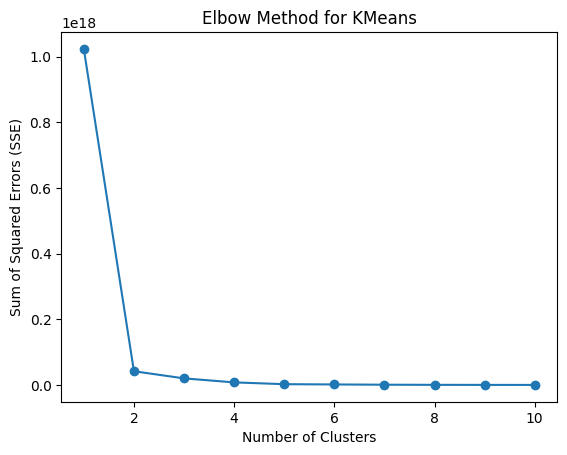

In [ ]:
find_optimal_clusters_kmeans(X2_soja, 10)

In [ ]:
#creacion del modelo con K optimo
kmeans = KMeans(n_clusters=2, random_state=42)
#entrenamos el modelo y guardamos los resutados en la variable clusters
clusters = kmeans.fit_predict(X2_soja)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
# creamos un df para el modelo KMeans, al que le vamos a agregar los clusters obtenidos
df_agrupado_por_provincia_soja_km = df_agrupado_por_provincia_soja.copy()
df_agrupado_por_provincia_soja_km['clusters'] = clusters
df_agrupado_por_provincia_soja_km

,provincia,produccion,rendimiento,sup_cosechada,sup_sembrada,clusters
0,Buenos Aires,643341842,18407392,240906088,247890023,1
1,Catamarca,4783545,406339,1941102,1973012,0
2,Chaco,55791812,3256948,27563405,29823015,0
3,Cordoba,623429710,4518096,232517732,237548212,1
4,Corrientes,1819576,947533,1122050,1219463,0
5,Entre Rios,131503951,2905792,57044647,59266194,0
6,Formosa,1240072,445215,589725,687440,0
7,Jujuy,862986,834243,358505,371893,0
8,La Pampa,38247391,1768692,15708999,16445452,0
9,Mendoza,0,0,0,35,0


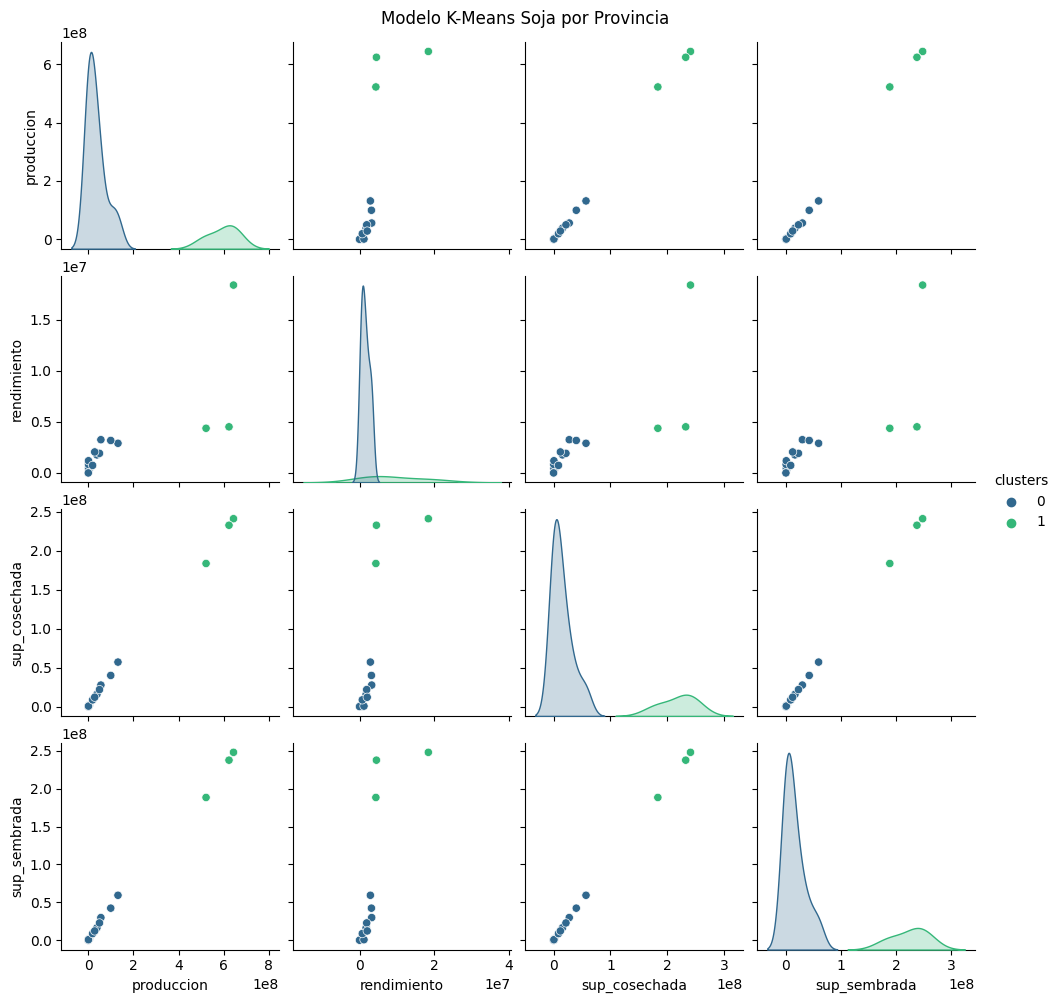

In [ ]:
sns.pairplot(df_agrupado_por_provincia_soja_km, hue='clusters', palette='viridis', vars=['produccion','rendimiento', 'sup_cosechada', 'sup_sembrada'])
plt.suptitle('Modelo K-Means Soja por Provincia', y=1)
plt.show()

In [ ]:
mapear = {0: 'Bajo', 1: 'Alto'}

df_agrupado_por_provincia_soja_km['nivel_produccion'] = df_agrupado_por_provincia_soja_km['clusters'].map(mapear)

# Mostrar el DataFrame actualizado
df_agrupado_por_provincia_soja_km

,provincia,produccion,rendimiento,sup_cosechada,sup_sembrada,clusters,nivel_produccion
0,Buenos Aires,643341842,18407392,240906088,247890023,1,Alto
1,Catamarca,4783545,406339,1941102,1973012,0,Bajo
2,Chaco,55791812,3256948,27563405,29823015,0,Bajo
3,Cordoba,623429710,4518096,232517732,237548212,1,Alto
4,Corrientes,1819576,947533,1122050,1219463,0,Bajo
5,Entre Rios,131503951,2905792,57044647,59266194,0,Bajo
6,Formosa,1240072,445215,589725,687440,0,Bajo
7,Jujuy,862986,834243,358505,371893,0,Bajo
8,La Pampa,38247391,1768692,15708999,16445452,0,Bajo
9,Mendoza,0,0,0,35,0,Bajo


In [ ]:
#  grafico de dispersin (scatter matrix) con plotly y con symbols para cada cluster y con discriminacion de nivel de produccion
fig = px.scatter_matrix(
    df_agrupado_por_provincia_soja_km,
    dimensions=['produccion', 'rendimiento', 'sup_cosechada', 'sup_sembrada'],
    color='provincia',
    symbol='nivel_produccion',
    labels={'clusters': 'Clusters'},
    title='Pair Plot con Información de Clusters y Tamaño de Puntos Ajustado',
)
fig.show()